# Orchard spray volume rate I

*[Hugo Pires](https://www.linkedin.com/in/hjmpires), 2016*

## Introduction
While striving to improve my skills I soon realized that trying to learn Object Oriented programing by yourself can be difficult, so I've decided to use some examples from my working expertise, pesticide application, using Python.

On this notebook, I will bring together some formulas usually used to plan a proper pesticide application. They have been used for long time, published, proved and presented in training sessions. I will just connect them on a train of thought.

It's funny that I've started trying to learn OOP and I've ended thinking about pesticide spraying in a quite different way. I've learned that bringing agriculture and computers together is not only developing new apps and interfaces. First off all it is building a new approach to old problems using computer science.

And the result is one possible way to organize our pesticide application process, using very simple classes that explain the formulas. I’ll be using this method here, on the ag-tech solution development in [Impactwave](www.impactwave.com), aiming to a more efficient and sustainable agriculture.

---

## First of all
I will need some libraries...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### ...and some data on nozzles.

When, early in my work, I started to work on reducing volume rate, I used [Albuz ATR 80 hollow cone nozzles](http://www.albuz-spray.com/en/busesenceramique-ceramicnozzles-boquillasdeceramica). I went back, remembered those times, and came up with some examples.

In [2]:
COLOR_CODES = ['WHITE','LILAC','BROWN','YELLOW','ORANGE','RED','GREY','GREEN','BLACK','BLUE']

In [3]:
PRESSURES = np.array([5.,6.,7.,8.,9.,10.,11.,12.,13.,14.,15.,16.,17.,18.,19.,20.,21.,22.,23.,24.,25.])

In [4]:
FLOW_RATES = np.array([
       [ 0.27,  0.36,  0.48,  0.73,  0.99,  1.38,  1.5 ,  1.78,  2.  ,  2.45],
       [ 0.29,  0.39,  0.52,  0.8 ,  1.08,  1.51,  1.63,  1.94,  2.18,  2.67],
       [ 0.32,  0.42,  0.56,  0.86,  1.17,  1.62,  1.76,  2.09,  2.35,  2.87],
       [ 0.34,  0.45,  0.6 ,  0.92,  1.24,  1.73,  1.87,  2.22,  2.5 ,  3.06],
       [ 0.36,  0.48,  0.64,  0.97,  1.32,  1.83,  1.98,  2.35,  2.64,  3.24],
       [ 0.38,  0.5 ,  0.67,  1.03,  1.39,  1.92,  2.08,  2.47,  2.78,  3.4 ],
       [ 0.39,  0.52,  0.7 ,  1.07,  1.45,  2.01,  2.17,  2.58,  2.9 ,  3.56],
       [ 0.41,  0.55,  0.73,  1.12,  1.51,  2.09,  2.26,  2.69,  3.03,  3.71],
       [ 0.43,  0.57,  0.76,  1.17,  1.57,  2.17,  2.35,  2.79,  3.14,  3.85],
       [ 0.44,  0.59,  0.79,  1.21,  1.63,  2.25,  2.43,  2.89,  3.26,  3.99],
       [ 0.46,  0.61,  0.81,  1.25,  1.69,  2.33,  2.51,  2.99,  3.36,  4.12],
       [ 0.47,  0.63,  0.84,  1.29,  1.74,  2.4 ,  2.59,  3.08,  3.47,  4.25],
       [ 0.48,  0.64,  0.86,  1.33,  1.79,  2.47,  2.67,  3.17,  3.57,  4.37],
       [ 0.5 ,  0.66,  0.89,  1.37,  1.84,  2.54,  2.74,  3.25,  3.67,  4.49],
       [ 0.51,  0.68,  0.91,  1.4 ,  1.89,  2.6 ,  2.81,  3.34,  3.76,  4.61],
       [ 0.52,  0.7 ,  0.93,  1.44,  1.94,  2.67,  2.88,  3.42,  3.85,  4.72],
       [ 0.54,  0.71,  0.95,  1.48,  1.99,  2.73,  2.95,  3.5 ,  3.94,  4.84],
       [ 0.55,  0.73,  0.98,  1.51,  2.03,  2.79,  3.01,  3.57,  4.03,  4.94],
       [ 0.56,  0.74,  1.  ,  1.54,  2.07,  2.85,  3.07,  3.65,  4.12,  5.05],
       [ 0.57,  0.76,  1.02,  1.58,  2.12,  2.91,  3.14,  3.72,  4.2 ,  5.15],
       [ 0.58,  0.77,  1.04,  1.61,  2.16,  2.97,  3.2 ,  3.8 ,  4.28,  5.25]
    ])

In [5]:
class NozzleType():
    
    def __init__(self, manufacturer, name, model, color_codes, pressures, flow_rates):
        self.manufacturer = manufacturer
        self.name = name
        self.model = model
        self.color_codes = color_codes
        self.pressures = pressures
        self.flow_rates = flow_rates

In [6]:
albuz_atr80 = NozzleType('Albuz', 'ATR 80', 'hollow cone', COLOR_CODES, PRESSURES, FLOW_RATES )

## Preparing the machinery
First of all I need to describe the orchard (vineyard will be analysed later). I can be pretty sure about distances and the area, but what is the tree height and width? For now, let’s use some average values and I will talk about sampling later.
* Height and width are tree canopy parameters (in meters)
* Row and tree distance tell us how far are the trees and then how many trees we have in the orchard (in meters,too)
* The area of the orchard is in hectares

In [7]:
class Orchard():
    
    def __init__(self, tree_height, tree_width, row_distance, tree_distance, orchard_area):
        """
        Sets orchard parameters and calculates the number of plants
        Calculates Tree Row Volume and the amount of spray needed per hectare and all orchard
        """
        self.tree_height, self.tree_width = tree_height, tree_width
        self.row_distance, self.tree_distance = row_distance, tree_distance
        self.orchard_area = orchard_area
        self.tree_number = round(10000 / (row_distance * tree_distance) * self.orchard_area)
        self.tree_row_volume = self.tree_height * self.tree_width * 10000 / self.row_distance

I've been using the Tree Row Volume method. Although it is a very simple model (with lots of limitations), it can quantify a very simple fact: there are not two identical orchards. You can read details about it on [Sutton and Unrath paper](http://www.apsnet.org/publications/PlantDisease/BackIssues/Documents/1984Articles/PlantDisease68n06_480.pdf). You can find an [interesting infographics](http://app.agrozapp.pt/admin/private/selene/download.php?URI=private%2Fstorage%2Finline_assets%2F39f3f5b40919b78d9f3a5e0bf9bca401.pdf&name=TRV.pdf) on that subject that we've made for Agrozapp Newsletter.

---
Probably you have some mold or bug annoying you and decided to apply some pesticide. By now I just want to know its name and dose to be applied per hectare.

In [8]:
class Pesticide():
    
    def __init__(self, name, dosis):
        self.name = name
        self.dosis = dosis

What do you use to spray? Well, most of the times, a sprayer...

In [9]:
class Sprayer():
    
    def __init__(self, nozzle_number, tank_capacity):
        self.nozzle_number = nozzle_number
        self.nozzle_array = []
        self.tank_capacity = tank_capacity

...with some nozzles on it...

In [10]:
class Nozzle():
    
    def __init__(self, flow_rate, nozzle_type, sprayer):
        self.flow_rate = flow_rate
        self.nozzle_type = nozzle_type
        self.sprayer = sprayer
        
        #Selecting the right nozzle
        dif = np.abs(self.nozzle_type.flow_rates - self.flow_rate / self.sprayer.nozzle_number)
        pressure_index, nozzle_index = np.unravel_index(dif.argmin(),\
                                                        (self.nozzle_type.flow_rates.shape[0],self.nozzle_type.flow_rates.shape[1]))
        self.color_code = self.nozzle_type.color_codes[nozzle_index]
        self.pressure = self.nozzle_type.pressures[pressure_index]
        self.real_flow_rate = round(self.nozzle_type.flow_rates[pressure_index, nozzle_index],2)

and pulled by a big and strong tractor.

In [11]:
class Tractor():
    
    def __init__(self, speed):
        """
        When you have a speedometer, just use it
        """
        self.speed = speed
        
    def set_speed(self, distance, time):
        """
        If not, just make a simple speed test
        Probably we have to make some changes on Imperial Units
        """
        self.speed = 3.6 * distance / time

So, the **application** itself, uses all this objects to work.

In [12]:
class Application():
    
    def __init__(self, orchard, pesticide, sprayer, tractor):
        self.orchard = orchard
        self.pesticide = pesticide
        self.sprayer = sprayer
        self.tractor = tractor
        
        self.spray_volume_rate = 200 + 0.02 * self.orchard.tree_row_volume
        self.spray_volume_total = self.spray_volume_rate * self.orchard.orchard_area
        
        #Probably the most important formula
        self.flow_rate = (self.spray_volume_rate * self.tractor.speed * self.orchard.row_distance) / 600
        self.selected_nozzle = Nozzle(self.flow_rate, albuz_atr80, self.sprayer)
        
        self.concentration = self.pesticide.dosis / self.spray_volume_rate
        self.total_pesticide = self.concentration * self.sprayer.tank_capacity
    
    def get_nozzle_config(self):
        return self.selected_nozzle
    
    def get_tank_mix(self):
        return ('Mix {} L of water with {} g of pesticide in tank'.\
                format(self.sprayer.tank_capacity, round(self.total_pesticide)))

## Let's spray

So, let's get started. I have a small pear tree orchard from which I know a few things:
* The height of the canopy,
* And its width
* The distance between rows and between trees
* And the area

In [13]:
old_valley = Orchard(4.5,1,4,2,1)

We've decided to use an copper based fungicide.

In [14]:
special_fungicide = Pesticide('Copper MIX', 2000)

And all the machinery in the farm.

In [15]:
fan_sprayer = Sprayer(10, 1000)

In [16]:
rusty_tractor = Tractor(6)

In [17]:
tomorrow_job = Application(old_valley, special_fungicide, fan_sprayer, rusty_tractor)

After all this work, I want some answers. So, what nozzle should I use? 

In [18]:
the_right_nozzle = tomorrow_job.get_nozzle_config()
print(the_right_nozzle.color_code)
print(the_right_nozzle.pressure)

ORANGE
15.0


And what tank mixture?

In [19]:
the_right_tank_mix = tomorrow_job.get_tank_mix()
the_right_tank_mix

'Mix 1000 L of water with 4706 g of pesticide in tank'

## Some more issues on TRV

By the way, did you notice that volume rate is a linear function of Tree Row Volume? The intercept is 200, which it means that every orchard will receive 200 L per hectare and the slope is 0.02, 20 L per 1000 m3 of tree row. Let's make a simple plot to show it. 

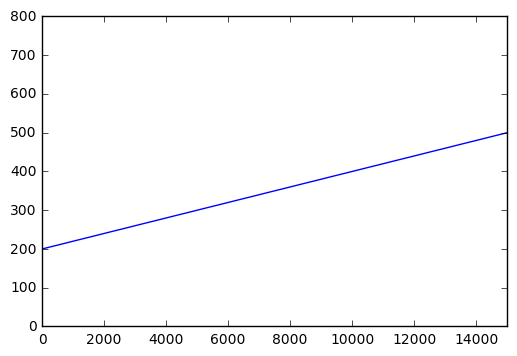

In [20]:
x = np.linspace(0,15000,16)
plt.axis((0,15000,0,800))
plt.plot(x, (200 + 0.02 * x));

The TRV, besides addressing the variation **between** diferent orchards can also deal with variation **inside** the same orchard along the phenological state. Again according to [Sutton and Unrath, 1984](http://www.apsnet.org/publications/PlantDisease/BackIssues/Documents/1984Articles/PlantDisease68n06_480.pdf), we know the coeficients:

In [21]:
DENSITIES = \
    {'extremely open': 0.7,
    'very open': 0.75,
    'well pruned': 0.8,
    'moderately well pruned': 0.85,
    'pruned minimally': 0.9,
    'little or no pruning': 0.95,
    'unpruned': 1}

and we can create a slightly diferent **Orchard** class (inheriting from the first), expanding the one that we've been using until now:

In [22]:
class DetailedOrchard(Orchard):
    
    def __init__(self, tree_height, tree_width, row_distance, tree_distance, orchard_area, pruned, densities):
        Orchard.__init__(self, tree_height, tree_width, row_distance, tree_distance, orchard_area)
        self.density = densities[pruned]
        self.tree_row_volume = (self.tree_height * self.tree_width * 10000 / self.row_distance) * self.density

In [23]:
newvalley = DetailedOrchard(4.5,1,4,2,1,'very open',DENSITIES)

In [24]:
work_on_weekend = Application(newvalley, special_fungicide, fan_sprayer, rusty_tractor)

In [25]:
a_diferent_nozzle = work_on_weekend.get_nozzle_config()
print(a_diferent_nozzle.color_code)
print(a_diferent_nozzle.pressure)

YELLOW
21.0


In [26]:
another_tank_mix = work_on_weekend.get_tank_mix()
another_tank_mix

'Mix 1000 L of water with 5424 g of pesticide in tank'

## Conclusion

I showed some evidence that the concentration depends on the dose and spray volume rate. When you change one of them, you must recalculate the others. That is the beginning of a good pesticie application.

This little work is not only useful by now, but also to the future. Classes could be reused in different scenarios - fertilization for instance, and could be "expanded" to add new features like dosis calculation, pressure adjustment and air flow rate. 

---

## Resources

This work is made of four ingredients: some ideas, lots of discussion with coleagues and farmers, support from [Impactwave](http://www.impactwave.com) team (specially Gonçalo Martins) and all the effort of the Python community:

* [Python 3.5.2 documentation](https://docs.python.org/3/)
* [matplotlib](http://matplotlib.org/)
* [NumPy](http://www.numpy.org/)